<AxesSubplot: >

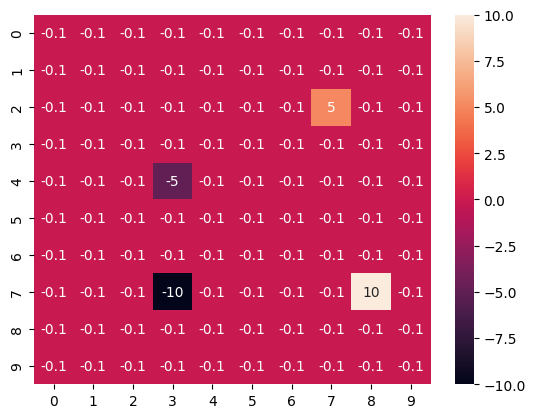

In [12]:
import numpy as np
import seaborn as sns
env = np.zeros((10, 10))
rew = np.zeros((10, 10)) - 0.1
rew[4, 3] = -5
rew[7, 3] = -10
rew[2, 7] = 5
rew[7, 8] = 10
# sns.heatmap(env, annot=True)
sns.heatmap(rew, annot=True)

In [31]:
prob = np.array([0.1, 0.8, 0.1])
prob_terminal = np.array([0.0, 0.0, 0.0])

In [32]:
def valid_location(loc, len_x=10, len_y=10):
    x, y = loc[0], loc[1]
    if x >= 0 and x < len_x and y >= 0 and y < len_y:
        return True
    return False

def get_value(values, rew, s_, s):
    if valid_location(s_):
        return rew[s_], values[s_]
    else:
        return rew[s], values[s]

def get_updated_value(i, j, values, rew, prob, gamma=0.9):
    n_up, n_down, n_left, n_right = (i + 1, j), (i - 1, j), (i, j - 1), (i, j + 1)
    
    r_u, v_u = get_value(values, rew, n_up, (i, j))
    r_d, v_d = get_value(values, rew, n_down, (i, j))
    r_l, v_l = get_value(values, rew, n_left, (i, j))
    r_r, v_r = get_value(values, rew, n_right, (i, j))
        
    v_u_action = r_u + gamma * (v_l * prob[0] + v_u * prob[1] + v_r * prob[2])
    v_d_action = r_d + gamma * (v_r * prob[0] + v_d * prob[1] + v_l * prob[2])
    v_l_action = r_l + gamma * (v_d * prob[0] + v_l * prob[1] + v_u * prob[2])
    v_r_action = r_r + gamma * (v_u * prob[0] + v_r * prob[1] + v_d * prob[2])
    
    return max(v_u_action, v_d_action, v_l_action, v_r_action)

In [33]:
values = np.zeros((10, 10))
def update_values(values):
    updated_values = np.zeros_like(values)
    for i in range(values.shape[0]):
        for j in range(values.shape[1]):
            if rew[i, j] == 5 or rew[i, j] == -5 or rew[i, j] == 10 or rew[i, j] == -10:
                # Terminal State
                updated_values[i, j] = get_updated_value(i, j, values, rew, prob_terminal)
            else:
                updated_values[i, j] = get_updated_value(i, j, values, rew, prob)
    
    return updated_values
    

In [34]:
for iter in range(1000):
    values = update_values(values)

<AxesSubplot: >

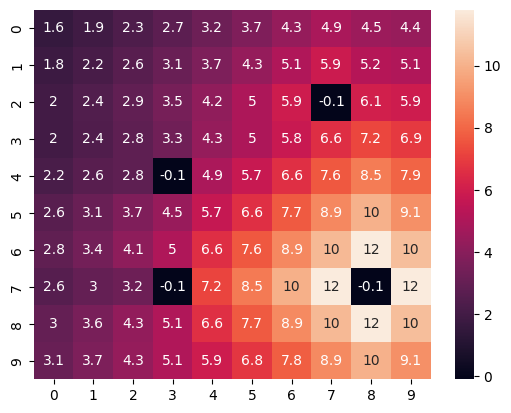

In [35]:
sns.heatmap(values, annot=True)